In [1]:
%load_ext autoreload
%autoreload 2

'''
ok there is a new idea... 
changing something.. 
'''

'\nok there is a new idea... \nchanging something.. \n'

In [2]:
from eden.util import configure_logging
import logging
configure_logging(logging.getLogger(),verbosity=2)
%matplotlib inline

In [3]:
'''
somehow we need to get RNA data...
'''
from eden.converter.fasta import fasta_to_sequence
from eden.converter.rna.rnafold import rnafold_to_eden

def rfam_uri(family_id):
    return '%s.fa'%(family_id)
def rfam_uri(family_id):
    return 'http://rfam.xfam.org/family/%s/alignment?acc=%s&format=fastau&download=0'%(family_id,family_id)


def get_graphs(rfam_id = 'RF00005'):
    seqs = fasta_to_sequence(rfam_uri(rfam_id))
    graphs = rnafold_to_eden(seqs, shape_type=5, energy_range=30, max_num=3)
    return graphs


In [4]:
%%time
'''
getting the grammar is the same as in the UberSampler so there is nothing interesting here..
if you need to debug do so in the UberSampler
'''
import os 
os.nice(20)
%matplotlib inline
import graphlearn.utils.draw as myutils
import graphlearn.abstract_graphs.rnasampler as rspl
import itertools
import graphlearn.localsubstitutablegraphgrammar as grammar
import graphlearn.abstract_graphs.abstract_graphtools as agt

# learn a grammar
graphs = get_graphs()
graphs = itertools.islice(graphs,100)
sampler=rspl.RNASampler(radius_list=[0,1,2],thickness_list=[2],base_thickness_list=[0.5,1], core_interface_pair_remove_threshold=1, interface_remove_threshold=2)
def whatever(**kwargs):
    return agt.extract_core_and_interface_directed_graph( **kwargs)
grammar.extract_core_and_interface_single_root = whatever

sampler.fit(graphs,n_jobs=1,batch_size=3)

sampler.save('tmp/rna_ubergrammar.ge')



ImportError: No module named abstract_graphtools

interface: 262169


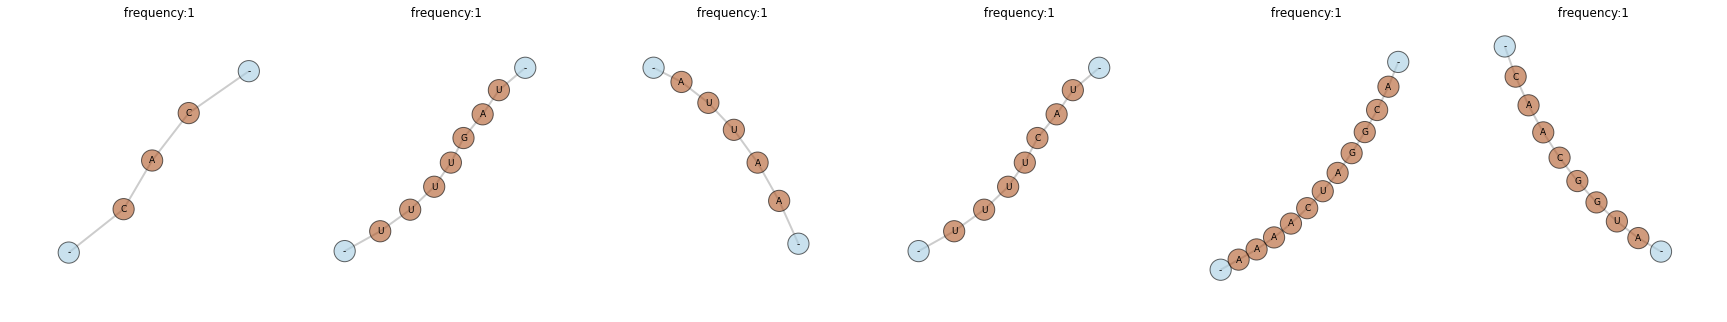

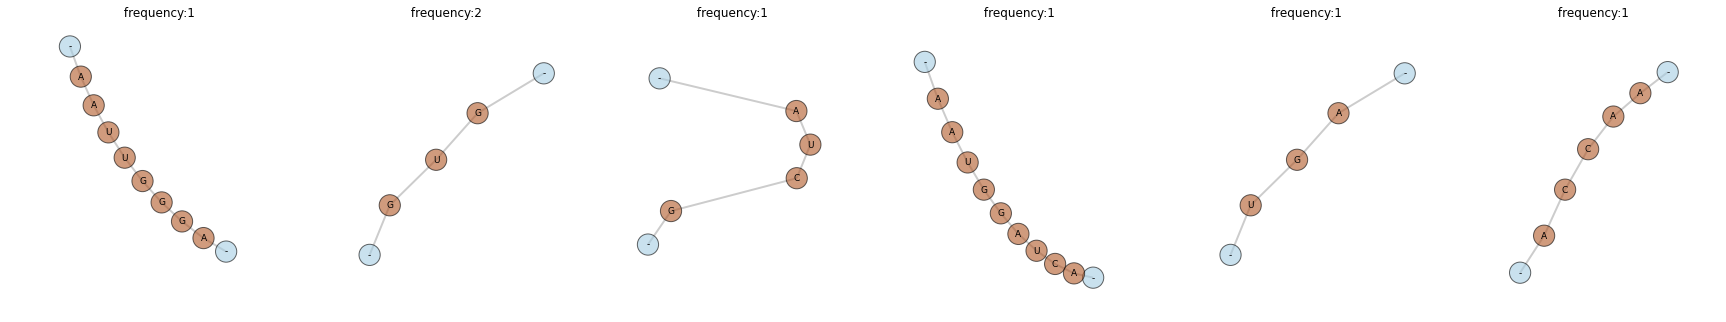

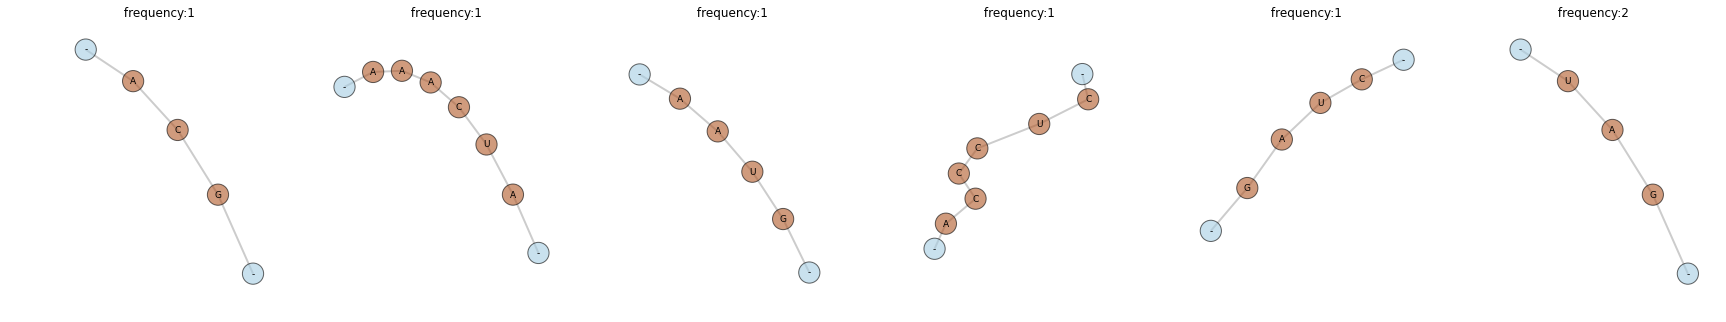

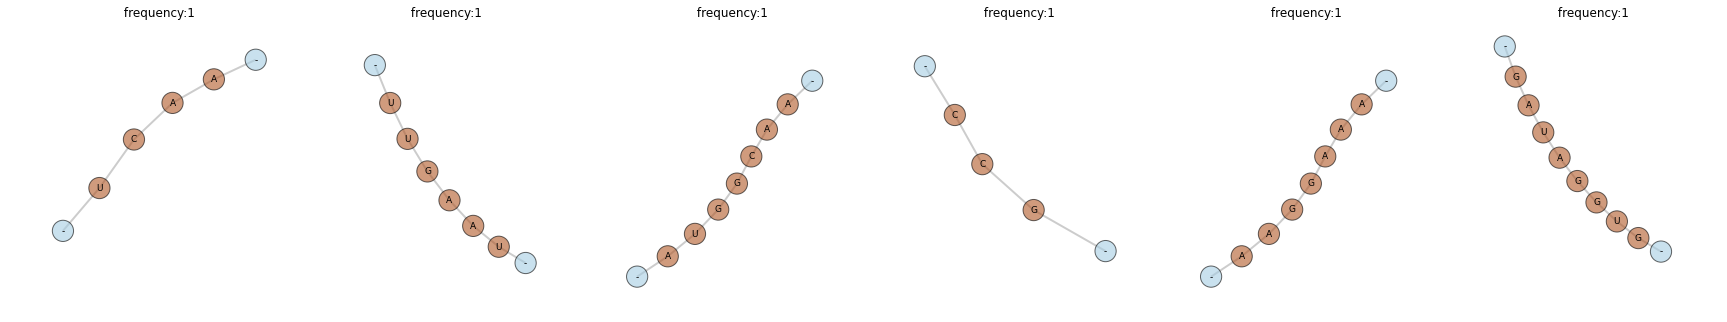

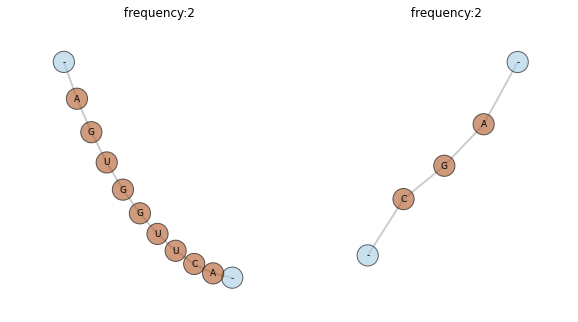

interface: 983066


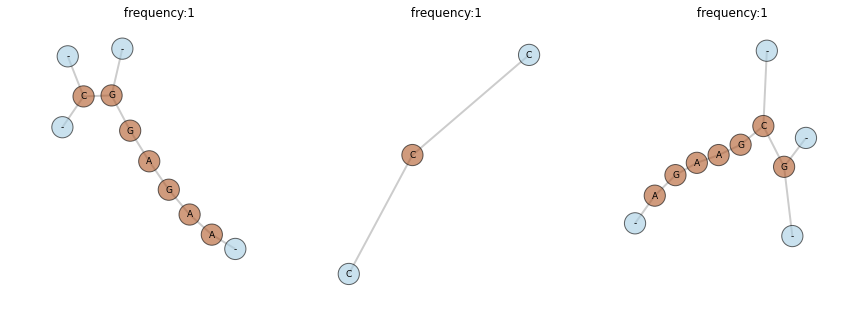

interface: 819238


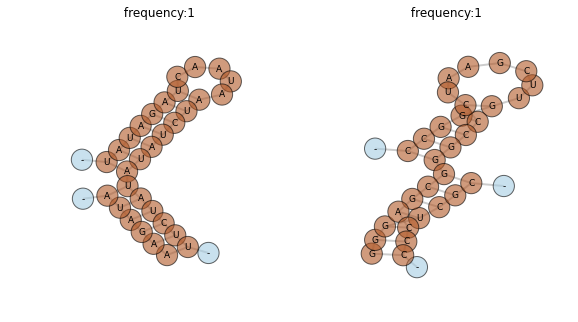

interface: 458795


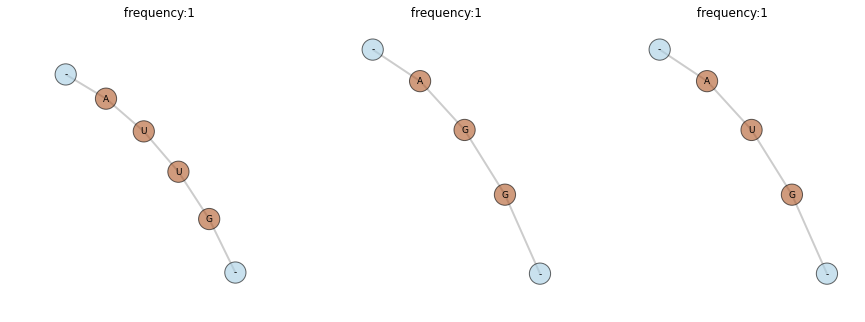

interface: 86


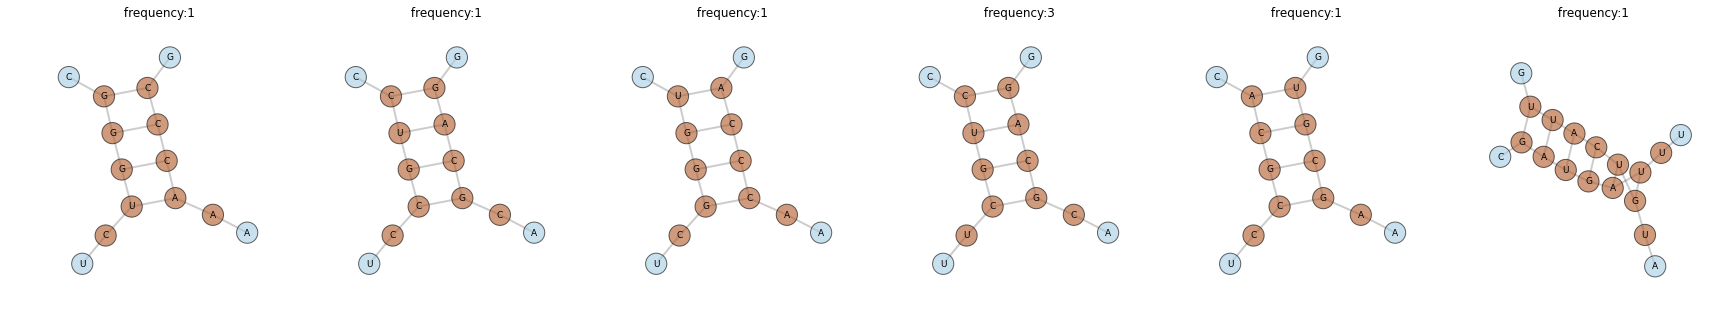

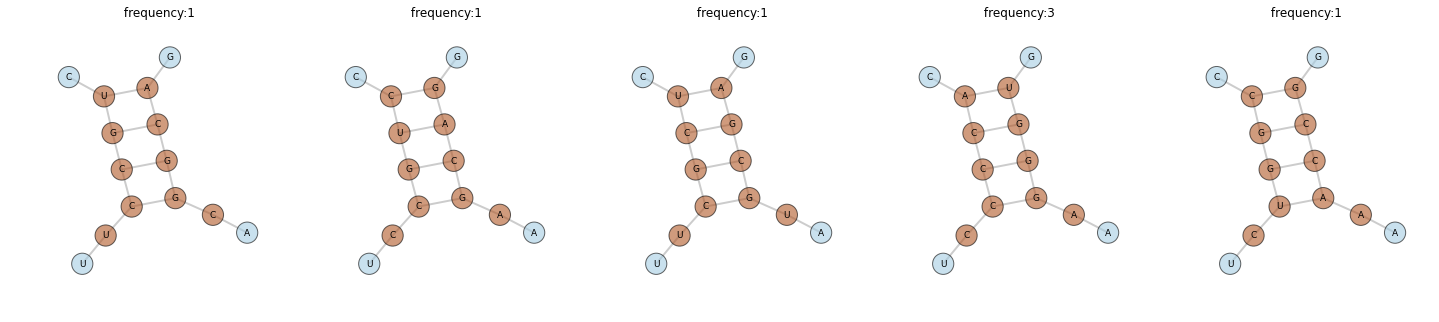

In [7]:
#draw production rules
myutils.draw_grammar(sampler.local_substitutable_graph_grammar.grammar,n_productions=5,
                     n_graphs_per_line=6, size=5, 
                     colormap='Paired', invert_colormap=False,node_border=1,
                     vertex_alpha=0.6, edge_alpha=0.2, node_size=450)

Loaded model: tmp/rna_ubergrammar.ge
preprocessing grammar
_sample_notes: None
accept_annealing_factor: 0.0
accept_static_penalty: 0.0
base_thickness_list: [1, 2]
batch_size: 1
   burnout: 0
complexity: 3
 estimator: CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.000240111853851, average=False, class_weight=None,
       epsilon=0.1, eta0=0.83448566316, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='log', n_iter=81, n_jobs=1,
       penalty='l1', power_t=0.888131784161, random_state=None,
       shuffle=True, verbose=0, warm_start=False),
            cv=2, method='sigmoid')
estimatorobject: <graphlearn.estimator.estimator instance at 0x7fe7081d5680>
feasibility_checker: <graphlearn.feasibility.FeasibilityChecker instance at 0x7fe7081d55f0>
generatormode: False
hash_bitmask: 1048575
keep_duplicates: True
local_substitutable_graph_grammar: <graphlearn.abstract_graphs.ubergraphlearn.UberGrammar object at 0x7fe70e95f910>
    n_jobs: 1
   n_steps: 50
 

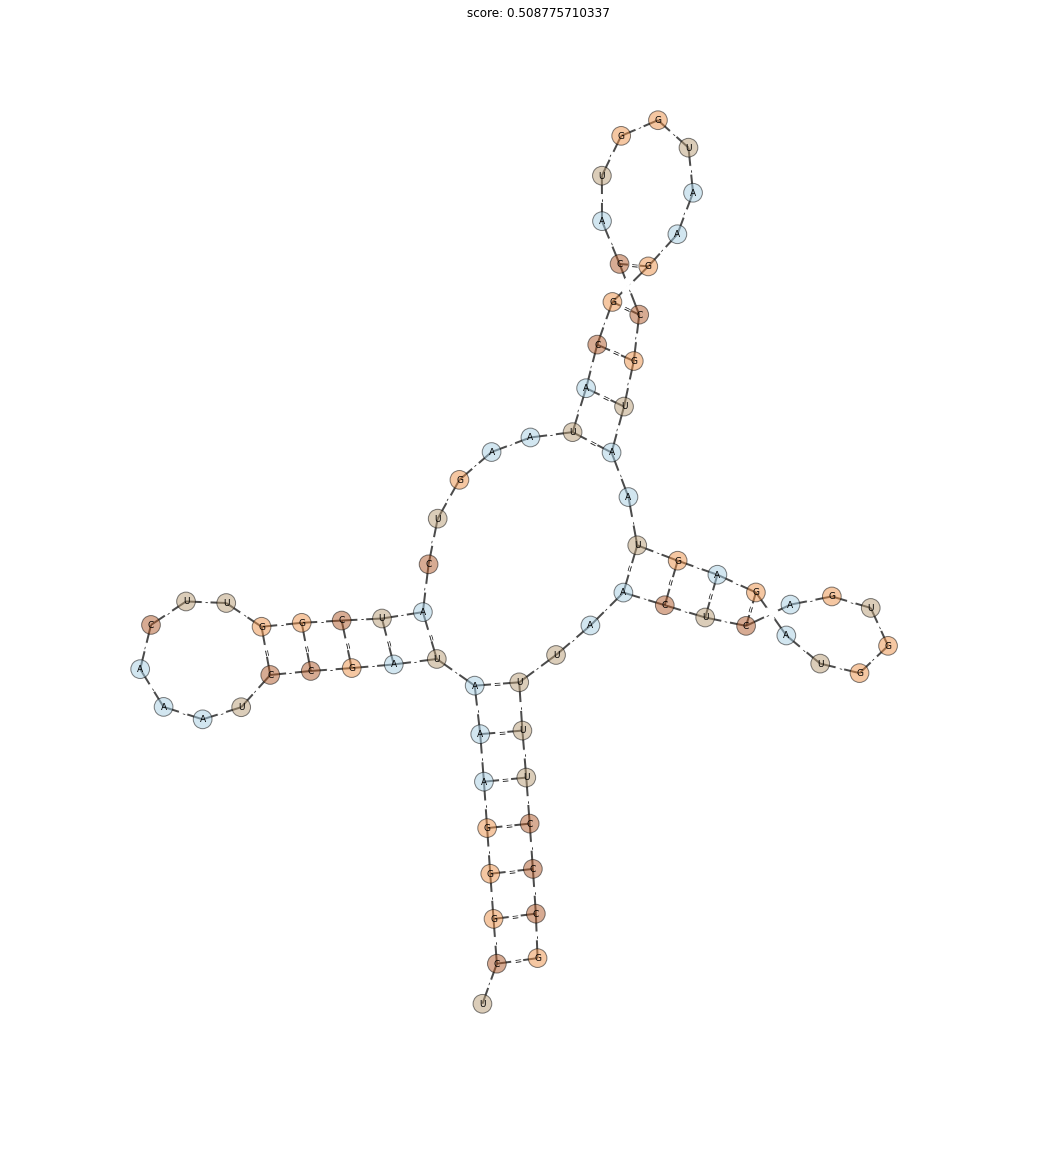

iteration:0
ERROR: empty graph
feasibility checker failed
ERROR: empty graph
feasibility checker failed
ERROR: empty graph
feasibility checker failed
ERROR: empty graph
feasibility checker failed
ERROR: empty graph
feasibility checker failed
ERROR: empty graph
feasibility checker failed
select_randomized_cips_from_grammar didn't find any acceptable cip in 
Traceback (most recent call last):
  File "graphlearn/graphlearn.py", line 239, in _sample
    candidate_graph = self._propose(graph)
  File "graphlearn/graphlearn.py", line 381, in _propose
    graph = self._propose_graph(graph)
  File "graphlearn/graphlearn.py", line 398, in _propose_graph
    for candidate_cip in candidate_cips:
  File "graphlearn/abstract_graphs/rnasampler.py", line 81, in _select_cips
    for chosen_cip in super(RNASampler,self)._select_cips(cip):
  File "graphlearn/graphlearn.py", line 448, in _select_cips
    raise Exception("select_randomized_cips_from_grammar didn't find any acceptable cip in ")
Exception: s

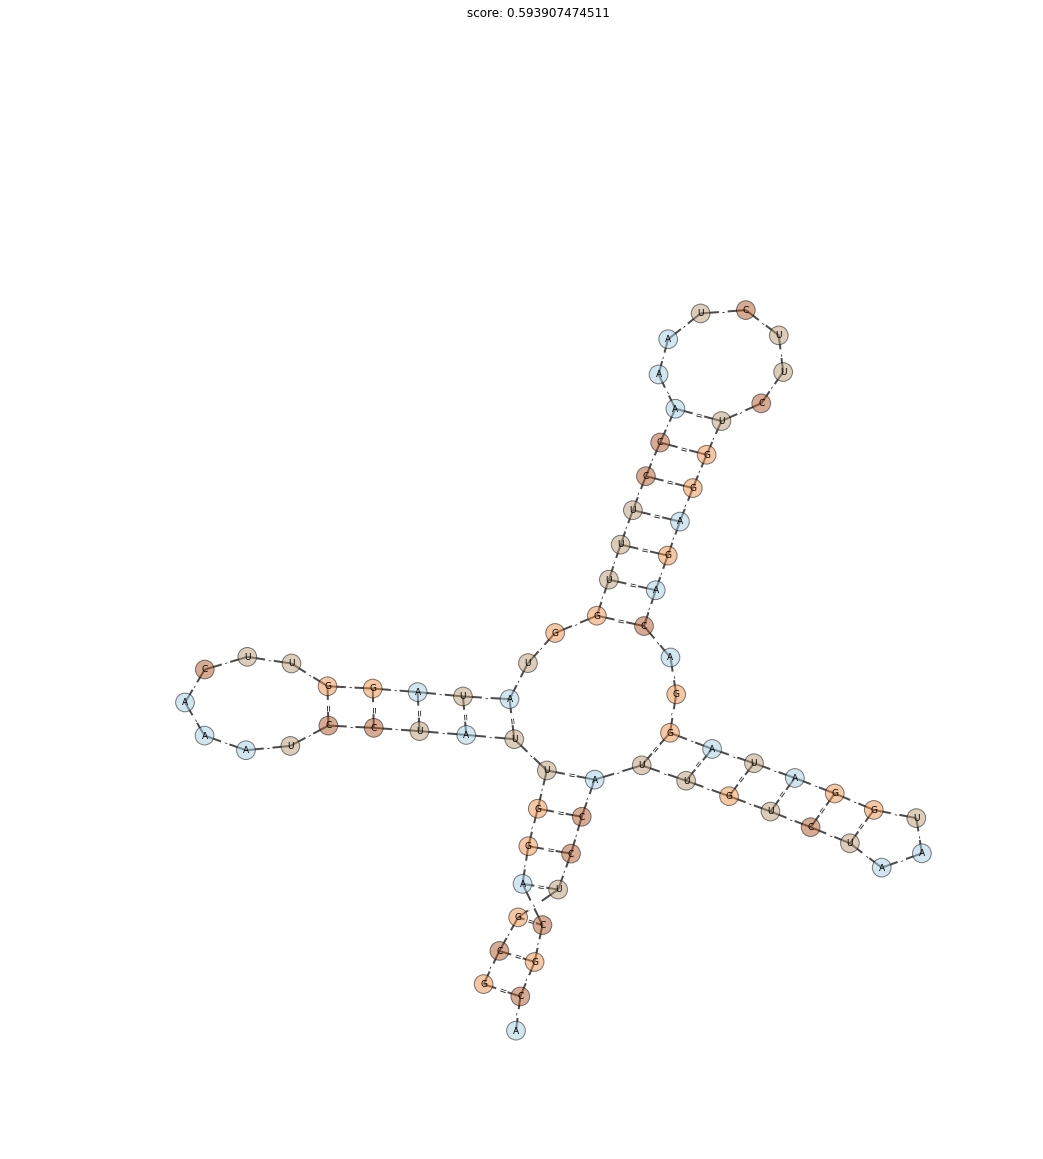

iteration:0
ERROR: empty graph
feasibility checker failed
ERROR: empty graph
feasibility checker failed
ERROR: empty graph
feasibility checker failed
select_randomized_cips_from_grammar didn't find any acceptable cip in 
Traceback (most recent call last):
  File "graphlearn/graphlearn.py", line 239, in _sample
    candidate_graph = self._propose(graph)
  File "graphlearn/graphlearn.py", line 381, in _propose
    graph = self._propose_graph(graph)
  File "graphlearn/graphlearn.py", line 398, in _propose_graph
    for candidate_cip in candidate_cips:
  File "graphlearn/abstract_graphs/rnasampler.py", line 81, in _select_cips
    for chosen_cip in super(RNASampler,self)._select_cips(cip):
  File "graphlearn/graphlearn.py", line 448, in _select_cips
    raise Exception("select_randomized_cips_from_grammar didn't find any acceptable cip in ")
Exception: select_randomized_cips_from_grammar didn't find any acceptable cip in 

Graph id: 17


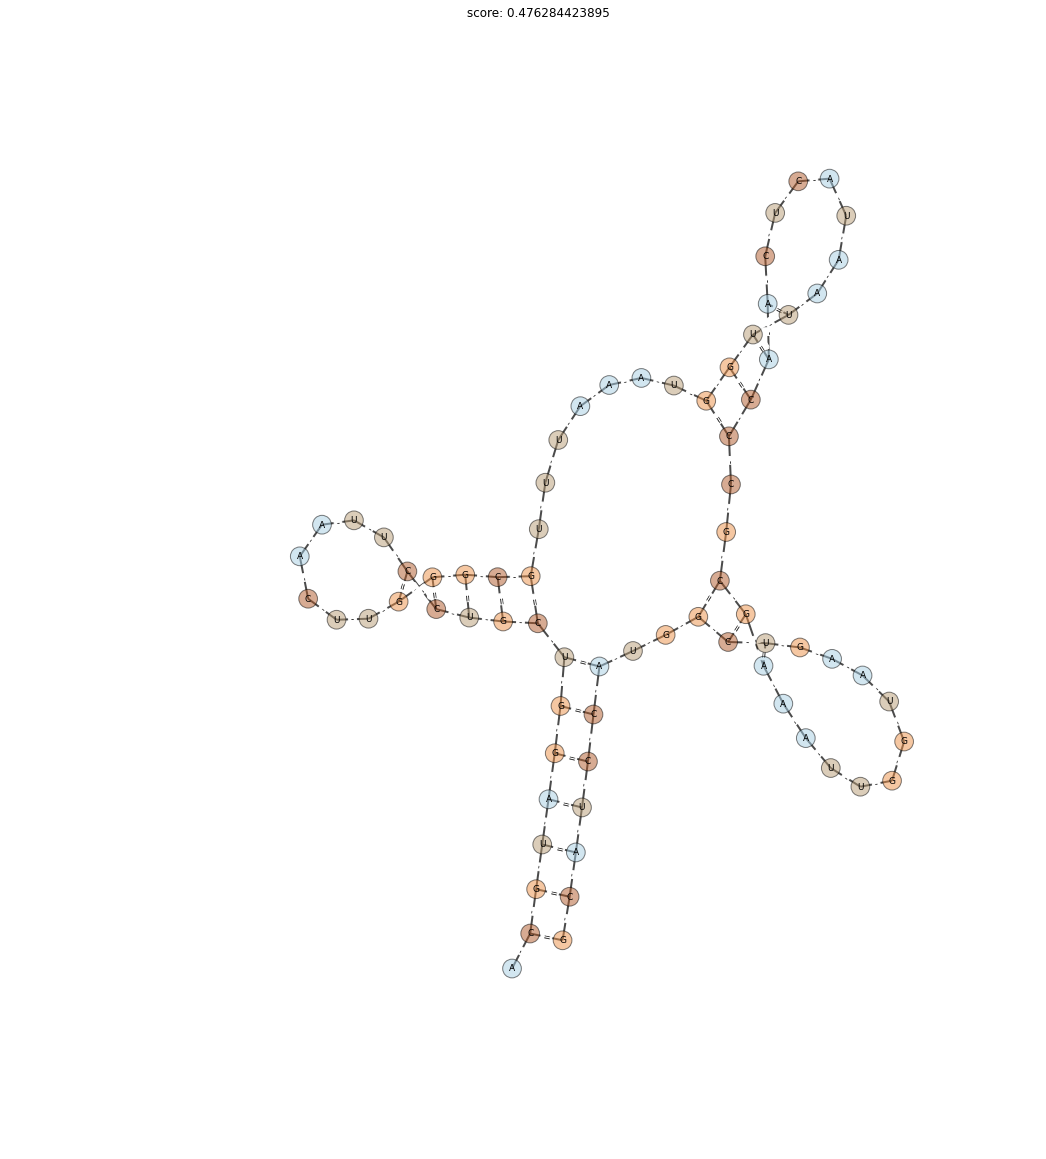

CPU times: user 22.5 s, sys: 1.08 s, total: 23.6 s
Wall time: 24.7 s


In [5]:
%%time
'''
RNA sampling
'''
import os
os.nice(19)

#import mpld3
#mpld3.enable_notebook()
import graphlearn.utils.draw as myutils
import graphlearn.abstract_graphs.rnasampler as rspl
from eden.converter.graph.gspan import gspan_to_eden
import itertools
import matplotlib.pyplot as plt
import graphlearn.utils.draw as myutils
import eden.graph as ge

sampler=rspl.RNASampler()
sampler.load('tmp/rna_ubergrammar.ge')
graphs = get_graphs()

id_start=15
id_end=id_start+3
graphs = itertools.islice(graphs,id_start,id_end)
n_steps=50

graphs = sampler.sample(graphs,
                        same_radius=False,
                        same_core_size=False,
                        n_samples=4,
                        batch_size=1,
                        n_steps=n_steps,
                        n_jobs=1,
                        accept_annealing_factor=0.0,
                        probabilistic_core_choice=True,
                        burnout=0,
                        select_cip_max_tries=200,
                        keep_duplicates=True)

from eden.modifier.graph.vertex_attributes import colorize   
scores=[]
ids=range(id_start,id_end)
for i,graph in enumerate(graphs):
    print 'Graph id: %d'%(ids[i])
    scores.append(graph.graph['sampling_info']['score_history'])
    path_graphs = graph.graph['sampling_info']['graphs_history']
    path_graphs = colorize(path_graphs,
                           output_attribute = 'color_level', 
                           labels = ['A','U','G','C'])
    myutils.draw_graph_set(path_graphs,
                           n_graphs_per_line=3, size=20, 
                           colormap='Paired', invert_colormap=False,node_border=0.5, vertex_color='color_level',
                           vertex_alpha=0.5, edge_alpha=0.7, node_size=350,edge_label='label',
                          headlinehook= myutils.get_score_of_graph
                          )
    

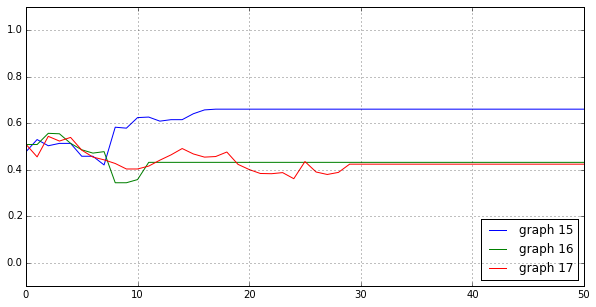

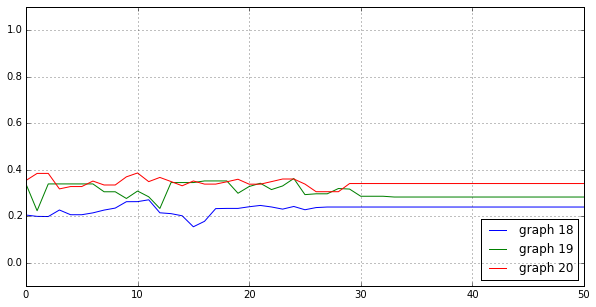

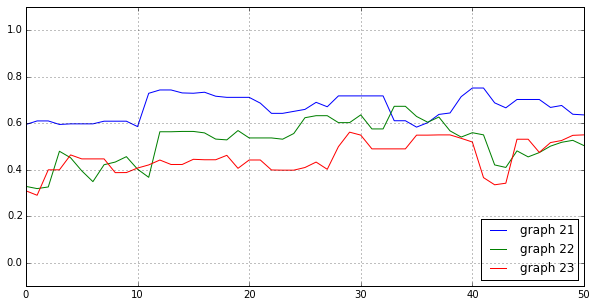

In [10]:
%matplotlib inline
from itertools import islice
import numpy as np

step=1
num_graphs_per_plot=3
num_plots=np.ceil([len(scores)/num_graphs_per_plot])
for i in range(num_plots):
    plt.figure(figsize=(10,5))
    for j,score in enumerate(scores[i*num_graphs_per_plot:i*num_graphs_per_plot+num_graphs_per_plot]):
        data = list(islice(score,None, None, step))
        plt.plot(data, label='graph %d'%(j+i*num_graphs_per_plot+id_start))
    plt.legend(loc='lower right')
    plt.grid()
    plt.ylim(-0.1,1.1)
    plt.show()

In [1]:

import networkx as nx
import graphlearn.utils.draw as draw
from eden.graph import Vectorizer

v=Vectorizer()
def getpathgraph(labels):
    nlabels= len(labels)
    G=nx.path_graph(nlabels)
    for e in range(nlabels):
        G.node[e]['label']=labels[e]
    for e in range(nlabels-1):
        G.edge[e][e+1]['label']='.'
    return G

g=getpathgraph("ABC")

g= v._edge_to_vertex_transform(g)

draw.display(g,contract=False)

g2=nx.DiGraph(g)
#draw.display(g2,contract=False,vertex_label='id')

for n,d in g2.nodes(data=True):
    if 'edge' in d:
        if d['label']=='.':
            ns=g2.neighbors(n)
            g2.remove_edge(ns[1],n)
            g2.remove_edge(n,ns[0])
          
       
g2 = g2.to_undirected()
draw.display(g2,contract=False,vertex_label='id')
g2.edges()
for n in g2.nodes():
    print n,g2.neighbors(n)
print isinstance(g2, nx.DiGraph) 

0 [3]
1 [3, 4]
2 [4]
3 [0, 1]
4 [1, 2]
False


In [3]:
g2

In [5]:
asd = g2.subgraph(range(2)).copy()

In [6]:
asd